In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import norm, skew #for some statistics
import statsmodels.api as sm
import statsmodels
from statsmodels.regression import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale

In [137]:
credit_df=pd.read_csv('Credit.csv')
credit_df.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [138]:
credit_df['Gender']=   credit_df['Gender'].map({'Male':1,'Female':0})
credit_df['Student']=  credit_df['Student'].map({'Yes':1,'No':0})
credit_df['Married']=  credit_df['Married'].map({'Yes':1,'No':0})
credit_df['Ethnicity']=credit_df['Ethnicity'].map({'Caucasian':1,'Asian':2,'African American':3})
credit_df.tail()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
395,396,12.096,4100,307,3,32,13,1,0,1,1,560
396,397,13.364,3838,296,5,65,17,1,0,0,3,480
397,398,57.872,4171,321,5,67,12,0,0,1,1,138
398,399,37.728,2525,192,1,44,13,1,0,1,1,0
399,400,18.701,5524,415,5,64,7,0,0,0,2,966


In [141]:
feature = ['Income', 'Age', 'Limit','Rating','Cards','Education','Gender','Student','Married','Ethnicity']
X = credit_df[feature] # Features
y = credit_df['Balance'] # Target variable

In [142]:
#regression without regularization
X=sm.add_constant(X)
model = sm.OLS(y, X)
results= model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     825.2
Date:                Tue, 02 Jul 2019   Prob (F-statistic):          6.28e-255
Time:                        23:57:08   Log-Likelihood:                -2399.2
No. Observations:                 400   AIC:                             4820.
Df Residuals:                     389   BIC:                             4864.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -472.5086     35.696    -13.237      0.000    -542.690    -402.327
Income        -7.7983      0.234    -33.299      0.000      -8.259      -7.338
Age           -0.6304      0.294     -2.148      0.032      -1.208      -0.053
Limit          0.1932      0.033      5.908      0.000       0.129       0.257
Rating         1.1004      0.490      2.248      0.025       0.138       2.063
Cards         17.9451      4.336      4.139      0.000       9.421      26.469
Education     -1.0820      1.598     -0.677      0.499      -4.224       2.060
Gender        10.4153      9.911      1.051      0.294      -9.071      29.902
Student      426.7273     16.695     25.561      0.000     393.904     459.550
Married       -7.4121     10.303     -0.719      0.472     -27.669      12.845
Ethnicity     -3.9208      6.001     -0.653      0.514     -15.719       7.877
==============================================================================
Omnibus:                       34.588   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.332
Skew:                           0.779   Prob(JB):                     1.06e-09
Kurtosis:                       3.232   Cond. No.                     3.83e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [143]:
#ridge regularization
results_rdg = model.fit_regularized(L1_wt=0, alpha=0.8, start_params=results.params)
ridge = sm.regression.linear_model.OLSResults(model, 
                                              results_rdg.params, 
                                              model.normalized_cov_params)

ridge.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     267.2
Date:                Tue, 02 Jul 2019   Prob (F-statistic):          2.07e-167
Time:                        23:57:26   Log-Likelihood:                -2606.8
No. Observations:                 400   AIC:                             5236.
Df Residuals:                     389   BIC:                             5279.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.2263     59.979     -0.204      0.839    -130.150     105.698
Income        -7.0748      0.394    -17.979      0.000      -7.848      -6.301
Age           -2.6115      0.493     -5.295      0.000      -3.581      -1.642
Limit          0.2749      0.055      5.003      0.000       0.167       0.383
Rating        -0.3689      0.823     -0.448      0.654      -1.986       1.249
Cards          5.6412      7.285      0.774      0.439      -8.682      19.964
Education    -11.6509      2.685     -4.339      0.000     -16.930      -6.372
Gender        -5.1005     16.654     -0.306      0.760     -37.843      27.642
Student       42.2784     28.052      1.507      0.133     -12.873      97.430
Married      -11.5912     17.312     -0.670      0.504     -45.628      22.446
Ethnicity    -10.3487     10.083     -1.026      0.305     -30.173       9.475
==============================================================================
Omnibus:                       64.024   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.828
Skew:                           1.056   Prob(JB):                     6.96e-21
Kurtosis:                       4.055   Cond. No.                     3.83e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [148]:
#lasso regularization
results_las = model.fit_regularized(L1_wt=1, alpha=0.01982813497868418, start_params=results.params)
lasso = sm.regression.linear_model.OLSResults(model, 
                                              results_las.params, 
                                              model.normalized_cov_params)

lasso.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     825.2
Date:                Tue, 02 Jul 2019   Prob (F-statistic):          6.28e-255
Time:                        23:59:11   Log-Likelihood:                -2399.2
No. Observations:                 400   AIC:                             4820.
Df Residuals:                     389   BIC:                             4864.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -471.7966     35.696    -13.217      0.000    -541.978    -401.615
Income        -7.7973      0.234    -33.295      0.000      -8.258      -7.337
Age           -0.6342      0.294     -2.161      0.031      -1.211      -0.057
Limit          0.1932      0.033      5.907      0.000       0.129       0.257
Rating         1.1003      0.490      2.247      0.025       0.138       2.063
Cards         17.9062      4.336      4.130      0.000       9.382      26.430
Education     -1.0992      1.598     -0.688      0.492      -4.241       2.042
Gender        10.3014      9.911      1.039      0.299      -9.185      29.788
Student      426.4828     16.695     25.546      0.000     393.660     459.306
Married       -7.3797     10.303     -0.716      0.474     -27.637      12.877
Ethnicity     -3.9144      6.001     -0.652      0.515     -15.712       7.884
==============================================================================
Omnibus:                       34.490   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.198
Skew:                           0.778   Prob(JB):                     1.13e-09
Kurtosis:                       3.228   Cond. No.                     3.83e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'weights')

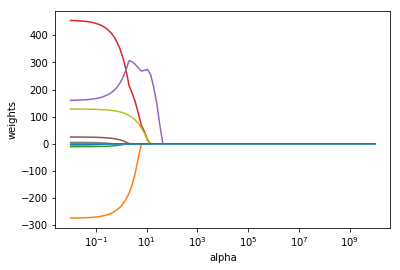

In [150]:
# find the best alpha 
alphas = 10**np.linspace(10,-2,100)*0.5
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X), y)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [151]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X, y)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X, y)
#mean_squared_error(y_test, lasso.predict(X_test))

Lasso(alpha=0.01982813497868418, copy_X=True, fit_intercept=True,
   max_iter=10000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [152]:
pd.Series(lasso.coef_, index=X.columns)

const          0.000000
Income        -7.747092
Age           -0.613759
Limit          0.195681
Rating         1.051205
Cards         17.937306
Education     -0.969052
Gender         9.516633
Student      425.280551
Married       -6.548224
Ethnicity     -3.447335
dtype: float64

In [161]:
values=[]
coff=list(results.params);
coff.insert(0,0)
values.append(coff)
Labels=['lamda','const','Income','Limit','Rating','Cards','Age',"Education",'Gender','Student','Married','Ethnicity']

In [162]:
for i in range(1,2000,3):
    res=model.fit_regularized(L1_wt=1, alpha=i, start_params=results.params)
    report = sm.regression.linear_model.OLSResults(model,res.params,model.normalized_cov_params)
    coff=list(report.params)
    coff.insert(0,i)
    values.append(coff)

In [163]:
FinalTest=pd.DataFrame(data=values,columns=Labels)
FinalTest

,lamda,const,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
0,0,-472.508570,-7.798307,-0.630429,0.193188,1.100389,17.945145,-1.081953,10.415251,426.727316,-7.412125,-3.920771
1,1,-436.602060,-7.745429,-0.820448,0.192058,1.095293,15.982133,-1.951504,4.672679,414.394559,-5.776494,-3.599620
2,4,-339.627522,-7.596402,-1.388139,0.188738,1.080640,9.972851,-4.566081,0.000000,378.427457,0.000000,0.000000
3,7,-235.845755,-7.445684,-1.963113,0.185438,1.066737,3.923622,-7.123296,0.000000,342.409322,0.000000,0.000000
4,10,-134.171552,-7.291787,-2.543179,0.182147,1.051812,0.000000,-9.941675,0.000000,306.576019,0.000000,0.000000
5,13,-41.948478,-7.116436,-3.144530,0.178974,1.029903,0.000000,-12.759216,0.000000,271.056433,0.000000,0.000000
6,16,0.000000,-6.768234,-3.260690,0.175410,1.009951,0.000000,-14.405613,0.000000,235.976253,0.000000,0.000000
7,19,-100.009485,-6.719448,-4.385121,0.172555,0.988846,0.000000,0.000000,0.000000,181.932784,0.000000,0.000000
8,22,-44.751005,-6.532119,-4.992555,0.169522,0.963922,0.000000,0.000000,0.000000,143.751188,0.000000,0.000000
9,25,0.000000,-6.279637,-5.464469,0.166252,0.939941,0.000000,0.000000,0.000000,106.438311,0.000000,0.000000
